In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
import os

In [2]:
data = pd.read_csv('final project abalone.csv')
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
data.columns = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight","Viscera_weight", "Shell_weight", 
                "Rings"]
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


Minimum height is 0 - should be checked.

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

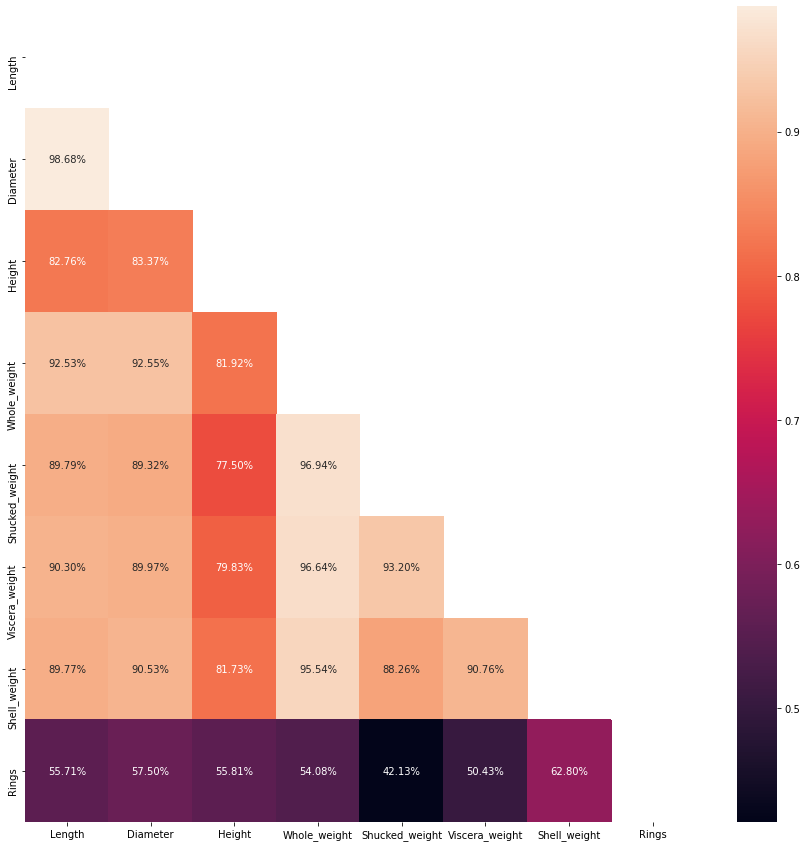

In [7]:
# HEATMAP BETWEEN VARIABLES

corr = data.corr('pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

pearson_meth =data.corr('pearson')
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2%')
plt.show()

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole_weight'}>],
       [<AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>,
        <AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

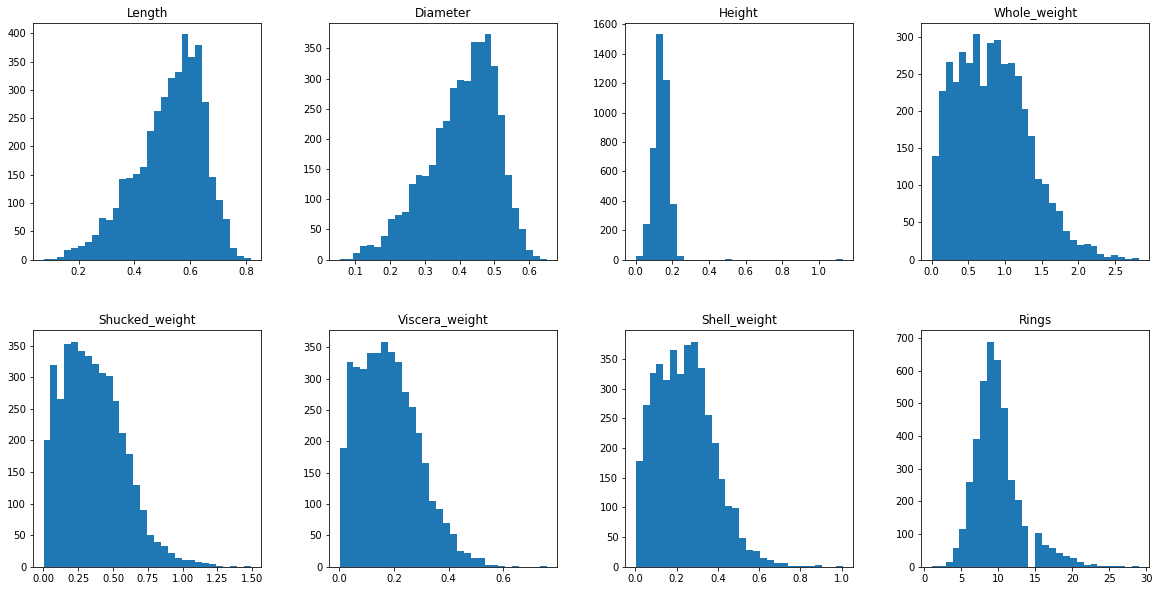

In [8]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [9]:
data.skew(axis = 0, skipna = True) 

Length           -0.640240
Diameter         -0.609457
Height            3.129241
Whole_weight      0.530576
Shucked_weight    0.718724
Viscera_weight    0.591463
Shell_weight      0.620547
Rings             1.115157
dtype: float64

In [10]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

In [11]:
categorical_features

Index(['Sex'], dtype='object')

In [12]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

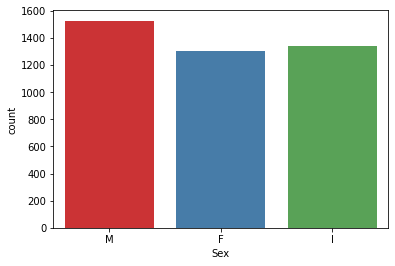

In [13]:
sns.countplot(x = 'Sex', data = data, palette="Set1")

c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


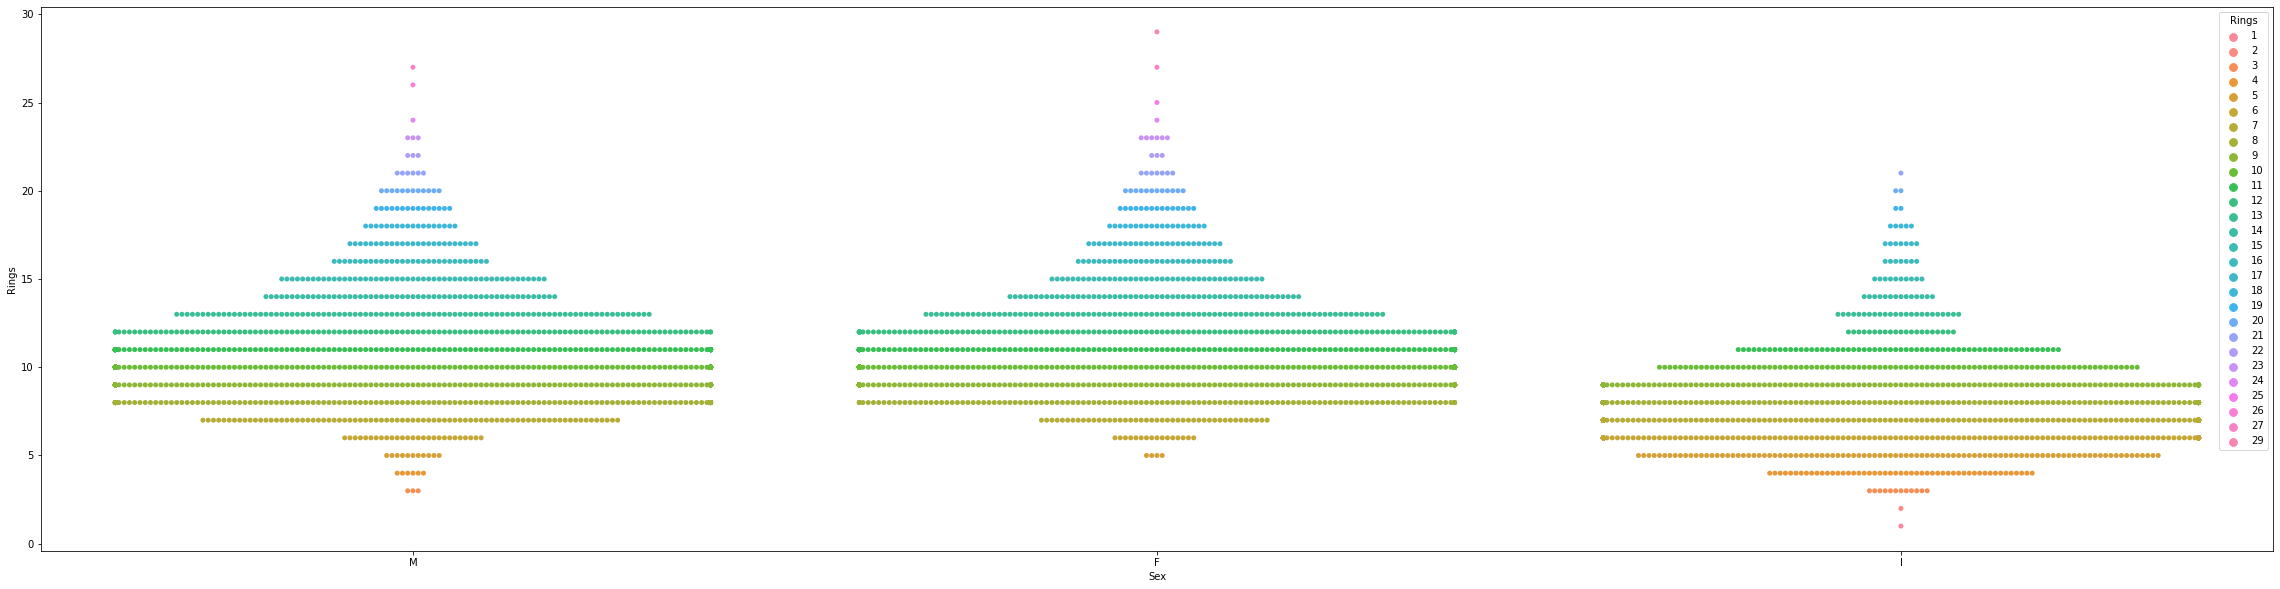

In [47]:
# GENDER DISTRIBUTION BY # of RINGS

plt.figure(figsize = (40,10))
ax = sns.swarmplot(x="Sex", y="Rings", hue="Rings", data=data)

In [31]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings']].mean().sort_values('Rings')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561460,0.439335,0.151418,0.991772,0.433083,0.215620,0.282056,10.702685
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


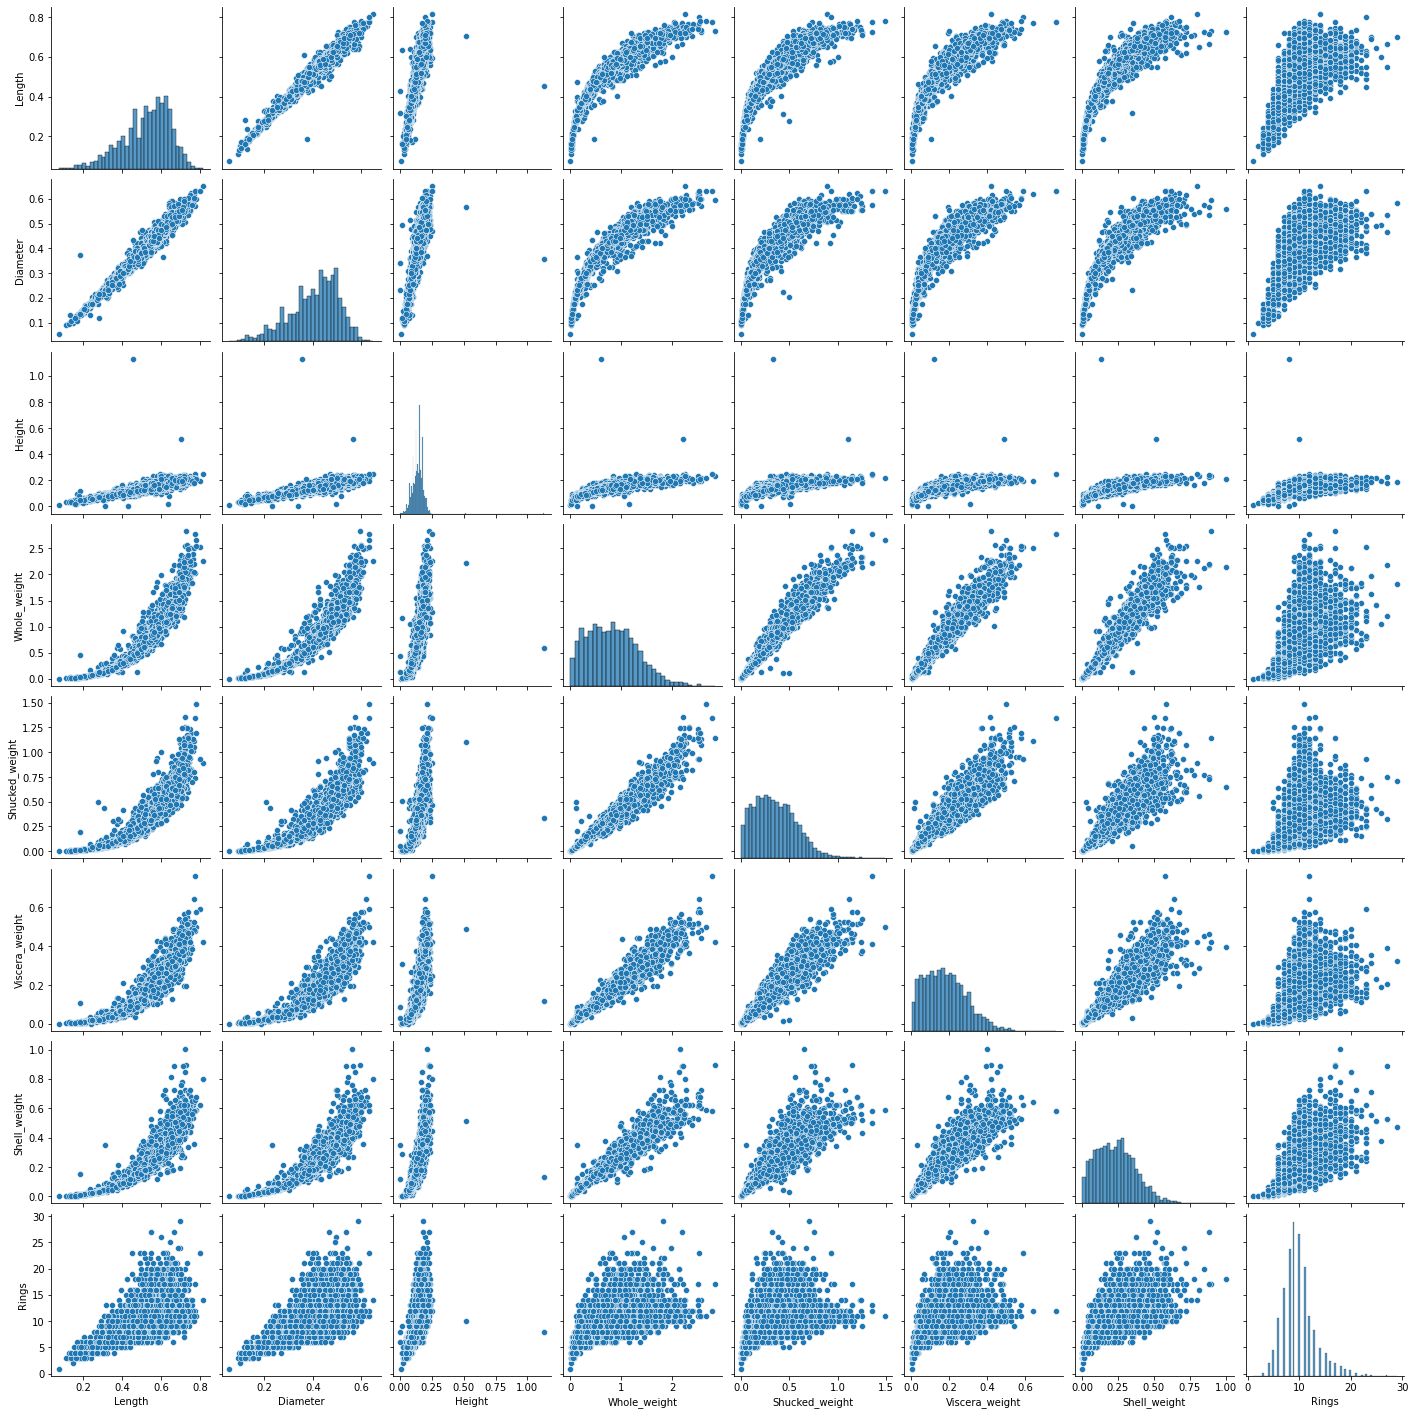

In [38]:
sns.pairplot(data[numerical_features])

# LENGTH IS LINEARLY CORRELATED WITH THE DIAMETR 

In [ ]:
# CHECKING FOR OUTLIERS AND REMOVING THEM

In [52]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<AxesSubplot:>

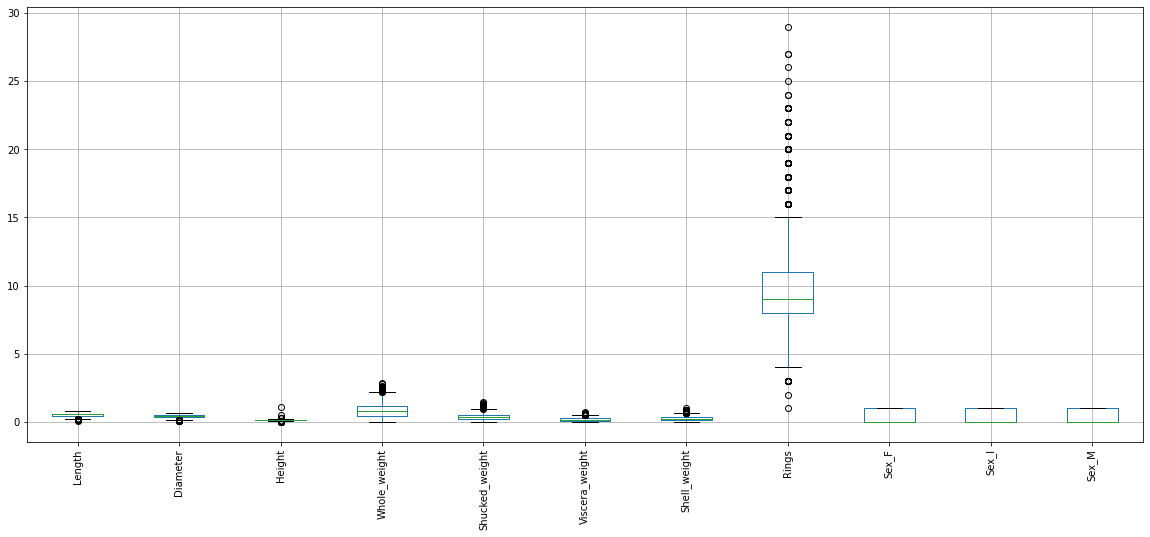

In [53]:
data.boxplot(rot=90, figsize=(20,8))

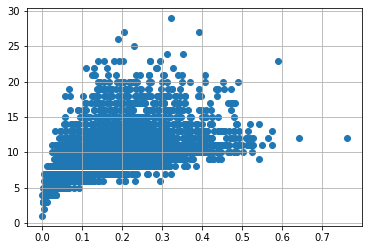

In [55]:
var = 'Viscera_weight'
plt.scatter(x = data[var], y = data['Rings'],)
plt.grid(True)

In [62]:
data.drop(data[(data['Viscera_weight']> 0.5) & (data['Rings'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera_weight']<0.5) & (data['Rings'] > 25)].index, inplace=True)

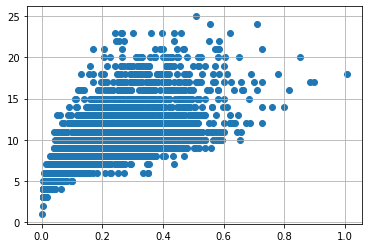

In [65]:
var = 'Shell_weight'
plt.scatter(x = data[var], y = data['Rings'],)
plt.grid(True)

In [66]:
data.drop(data[(data['Shell_weight']> 0.5) & (data['Rings'] < 20)].index, inplace=True)
data.drop(data[(data['Shell_weight']<0.5) & (data['Rings'] > 25)].index, inplace=True)

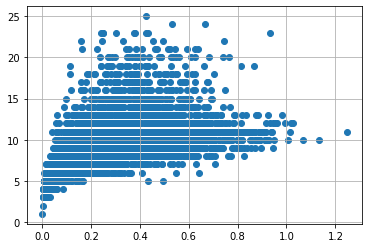

In [68]:
var = 'Shucked_weight'
plt.scatter(x = data[var], y = data['Rings'],)
plt.grid(True)

In [70]:
data.drop(data[(data['Shucked_weight']>= 1) & (data['Rings'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked_weight']<1) & (data['Rings'] > 20)].index, inplace=True)

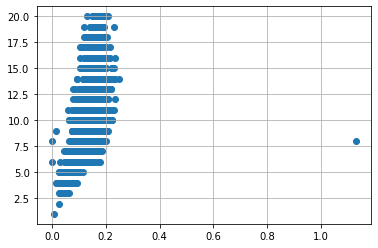

In [72]:
var = 'Height'
plt.scatter(x = data[var], y = data['Rings'],)
plt.grid(True)

In [73]:
data.drop(data[(data['Height']>0.4) & (data['Rings'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['Rings'] > 25)].index, inplace=True)

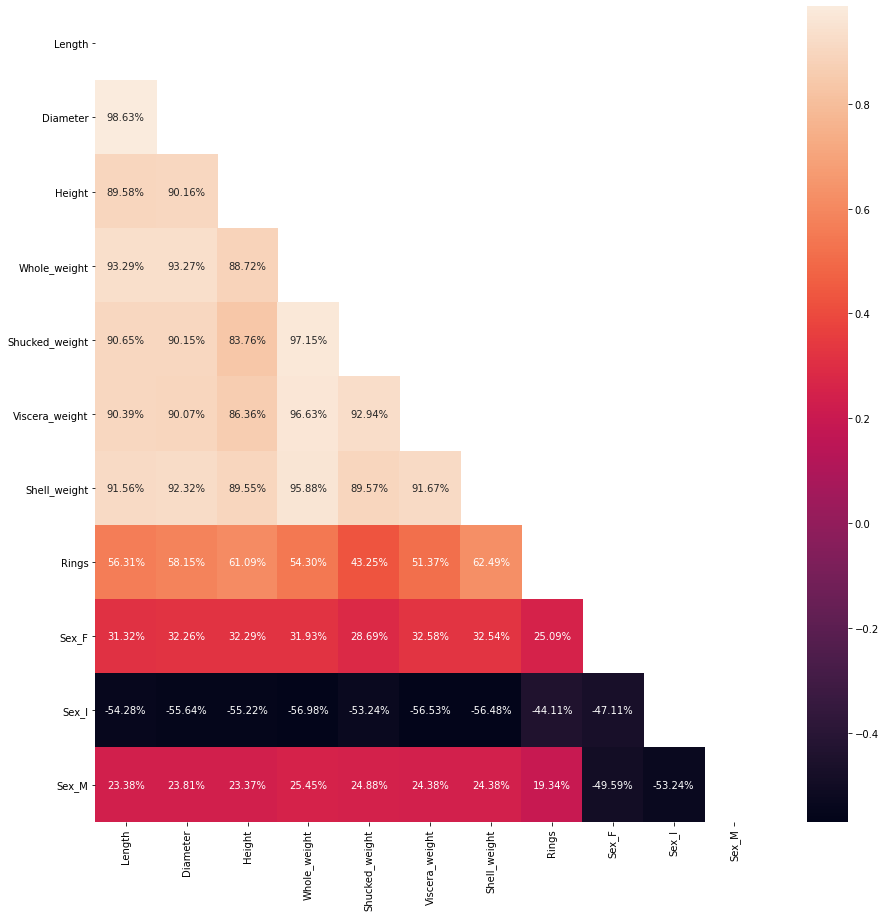

In [75]:
# CORRELATION MATRIX BETWEEN VARIABLES AFTER ALL

corr = data.corr('pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

pearson_meth =data.corr('pearson')
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2%')
plt.show()

In [76]:
# splitting the dependent and independent variables

y = data['Rings']
data = data.drop(['Rings'], axis = 1)
x = data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (3987, 10)
Shape of y: (3987,)


In [77]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3189, 10)
Shape of x_test : (798, 10)
Shape of y_train : (3189,)
Shape of y_test : (798,)


In [82]:
# MODELLING, RANDOM FOREST 

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# EVALUATION
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# R2
r2 = r2_score(y_test, y_pred)

print("R2 Score :", r2)

RMSE : 2.430229420773682
R2 Score : 0.3493853976232423


In [83]:
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0404 ± 0.0143,Shucked_weight
0.0371 ± 0.0225,Shell_weight
0.0293 ± 0.0193,Viscera_weight
0.0223 ± 0.0108,Length
0.0221 ± 0.0139,Height
0.0180 ± 0.0108,Sex_I
0.0118 ± 0.0203,Diameter
0.0090 ± 0.0077,Whole_weight
0.0080 ± 0.0089,Sex_F
0.0053 ± 0.0029,Sex_M


In [84]:
data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0


In [99]:
def age_of_the_abalone():
    
    Length = float(input("Enter abalone's length here: "))
    Diameter = float(input("Enter abalone's diameter: "))
    Height = float(input("Enter abalone's height: "))
    Whole_weight = float(input("Enter abalone's the whole weight: "))
    Shucked_weight = float(input("Enter abalone's the whshucked weight: "))
    Viscera_weight = float(input("Enter abalone's the viscera weight: "))
    Shell_weight = float(input("Enter abalone's the shell weight: "))
    
    sex = input("Enter abalon's sex here (Female/I/Male): ")
    
    sex_f = 0
    sex_i = 0
    sex_m = 0
    if ( sex == "Female" ):
        sex_f  = 1
    elif (sex == "I"):
        sex_i = 1
    else:
        sex_m = 1
        

    user_data = {'Length': [Length], 'Diameter': [Diameter], 'Height': [Height], 'Whole_weight': [Whole_weight], 
                 'Shucked_weight': [Shucked_weight], 'Viscera_weight': [Viscera_weight], 'Shell_weight': [Shell_weight], 
                 'Sex_F': [sex_f], 'Sex_I': [sex_i], 'Sex_M': [sex_m]}
    user_df = pd.DataFrame(user_data)
    
    user_pred = model.predict(user_df)

    print("The predicted age of the abalone is: ", user_pred*1.5)

In [100]:
age_of_the_abalone()

Enter abalone's length here: 1
Enter abalone's diameter: .3
Enter abalone's height: .7
Enter abalone's the whole weight: 1.2
Enter abalone's the whshucked weight: .8
Enter abalone's the viscera weight: .2
Enter abalone's the shell weight: .2
Enter abalon's sex here (Female/I/Male): Female
The predicted age of the abalone is:  [13.5]
